# Introduction

This analysis aims to provide personalized movie recommendations to users on a streaming platform based on their movie preferences and rating history. In the highly competitive streaming industry, offering relevant and tailored content is essential to increasing user engagement and reducing churn. By leveraging the MovieLens dataset from the GroupLens research lab at the University of Minnesota, this project seeks to create a recommendation system that enhances the user experience and drives long-term engagement.

## Business Problem

A streaming service is looking to improve user satisfaction and engagement by offering personalized movie recommendations. Despite having a large library of content, many users are not engaging with the platform as expected, resulting in lower average watch times and higher churn rates. The company wants to develop a movie recommendation system that can provide users with a tailored list of movies based on their past ratings and viewing history, increasing the likelihood of engagement and retention.

### Objectives

**Main Objective:** Build a recommendation system that provides the top 5 movie recommendations to each user based on their ratings of other movies. The model will be built using collaborative filtering techniques and enhanced by a hybrid approach to mitigate the cold-start problem for new users.

**Increase User Engagement**: Offer personalized recommendations that match individual preferences, encouraging users to explore more content on the platform, leading to increased average watch time.

**Improve Retention**: By consistently offering relevant recommendations, the system will help reduce user churn and foster long-term platform loyalty.

**Personalize Content Discovery**: Enable users to discover content that aligns with their unique tastes, ensuring they feel more connected to the platform and its offerings.

**Cold-Start Problem Mitigation**: For new users who haven’t rated or interacted with many movies, implement a hybrid recommendation approach that combines collaborative filtering with content-based filtering to make relevant suggestions early in their platform experience

In [49]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# read data
link = pd.read_csv('data/links.csv')
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [11]:
link.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [8]:
movies = pd.read_csv('data/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [12]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
ratings = pd.read_csv('data/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [13]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [18]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [34]:
# Combine the datasets
movie_ratings = pd.merge(ratings, movies, on='movieId', how='left')
movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [35]:
movie_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [252]:
merged_df = pd.merge(movie_ratings, tags, on='movieId', how='inner')
merged_df

,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,289,moldy,1143424860
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,289,old,1143424860
...,...,...,...,...,...,...,...,...,...
233208,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,567,dark,1525283942
233209,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,567,emotional,1525283946
233210,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,567,gritty,1525283940
233211,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,567,heartbreaking,1525283948


In [253]:
merged_df.isna().sum()

userId_x       0
movieId        0
rating         0
timestamp_x    0
title          0
genres         0
userId_y       0
tag            0
timestamp_y    0
dtype: int64

In [254]:
# drop userId_y and timestamp_y 
merged_df = merged_df.drop(columns=['timestamp_y', 'userId_y', 'timestamp_x'])


In [255]:
# rename userId_x
merged_df = merged_df.rename(columns={'userId_x' : 'userId'})

In [256]:
merged_df.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
tag        0
dtype: int64

In [257]:
merged_df.head()

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,old


## EDA
1. Univariate Analysis
2. Bivariate Analysis

### 1. Univariate Analysis

#### 1.1 Rating

In [258]:
# RATING
merged_df.rating.value_counts()

rating
4.0    64781
5.0    63845
4.5    31502
3.0    28550
3.5    22895
2.0     7955
2.5     6488
1.0     3721
0.5     1908
1.5     1568
Name: count, dtype: int64

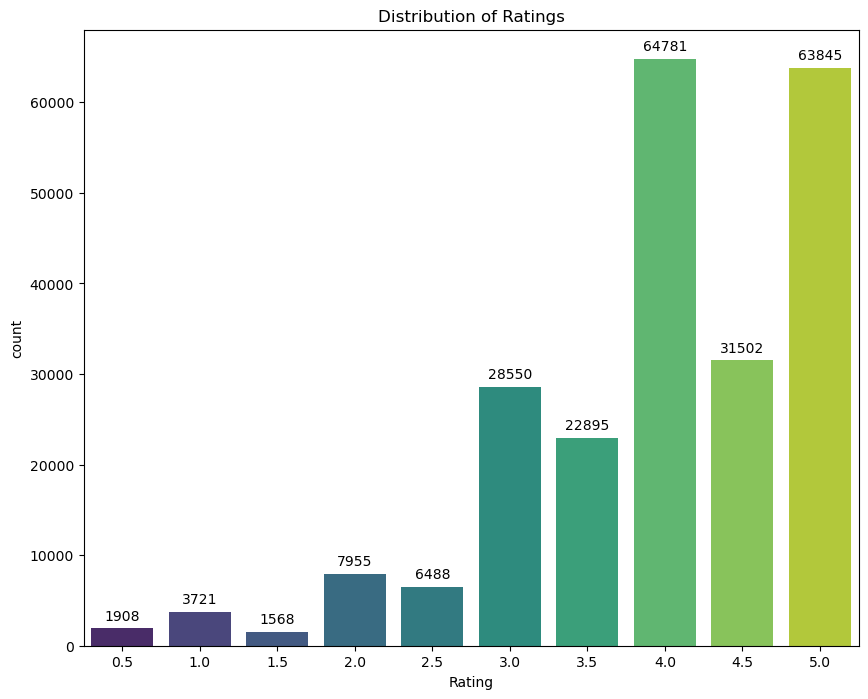

In [259]:
# bar chart 
fig, ax = plt.subplots(figsize=(10,8))

#x
x = merged_df.rating.value_counts().index
#y
y = merged_df.rating.value_counts().values


sns.barplot(x=x,y=y, ax=ax, palette='viridis')
ax.set_xlabel('Rating')
ax.set_ylabel('count')
ax.set_title('Distribution of Ratings');

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

- **4.0**(64781) and **5.0**(63845) are the most ferequent ratings

#### 1.2 Tags

In [260]:
merged_df['tag'].value_counts()

tag
sci-fi                        2527
thought-provoking             2487
twist ending                  2434
atmospheric                   2227
dark comedy                   2056
                              ... 
representation of children       1
Titanic                          1
Ninotchka remake                 1
Tokyo                            1
big wave                         1
Name: count, Length: 1584, dtype: int64

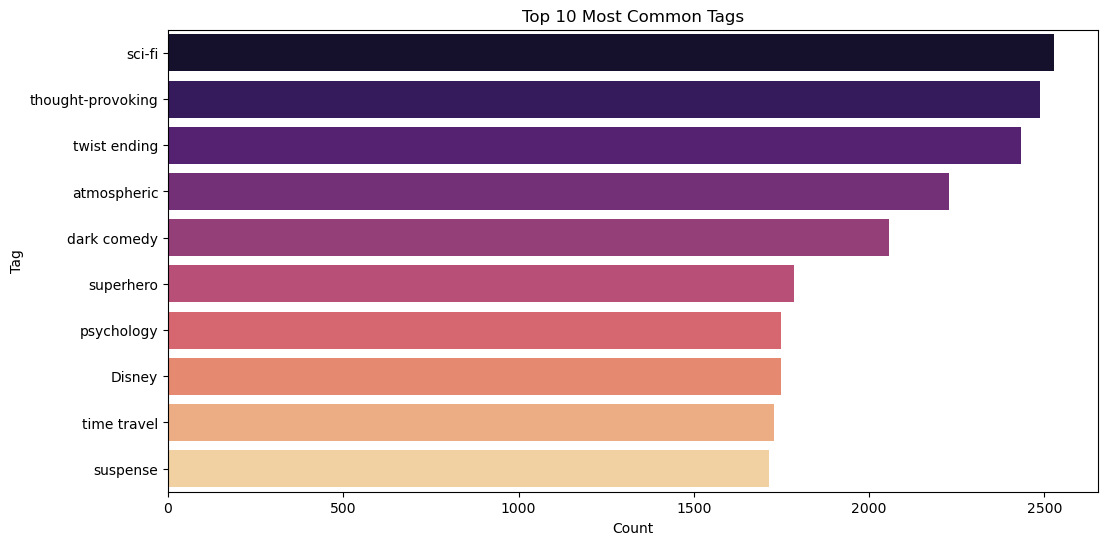

In [261]:
# Number of occurrences for each tag
tag_counts = merged_df['tag'].value_counts()

# Plot the top 10 most common tags
top_10_tags = tag_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_tags.values, y=top_10_tags.index, palette='magma')
plt.title("Top 10 Most Common Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()


**Sci-fi**, **thought-provoking** and **twist ending** are the most common movie tags

#### 1.3 Genres

In [262]:
merged_df['genres'].value_counts()

genres
Comedy|Crime|Drama|Thriller                   56851
Action|Crime|Drama|Thriller                   16725
Action|Adventure|Sci-Fi                       11939
Drama                                          6242
Comedy                                         5486
                                              ...  
Drama|Thriller|Western                            1
Adventure|Comedy|Crime|Drama|Romance              1
Comedy|Crime|Drama|Musical|Mystery|Romance        1
Comedy|Crime|Drama|Mystery|Romance                1
Animation|Drama|Romance|Sci-Fi                    1
Name: count, Length: 370, dtype: int64

In [263]:
# Split genres and explode them into individual rows
merged_df['genres'] = merged_df['genres'].str.split('|')
genre_expl = merged_df.explode('genres')

# Count the occurrences of each genre
genre_counts = genre_expl['genres'].value_counts().head(10)

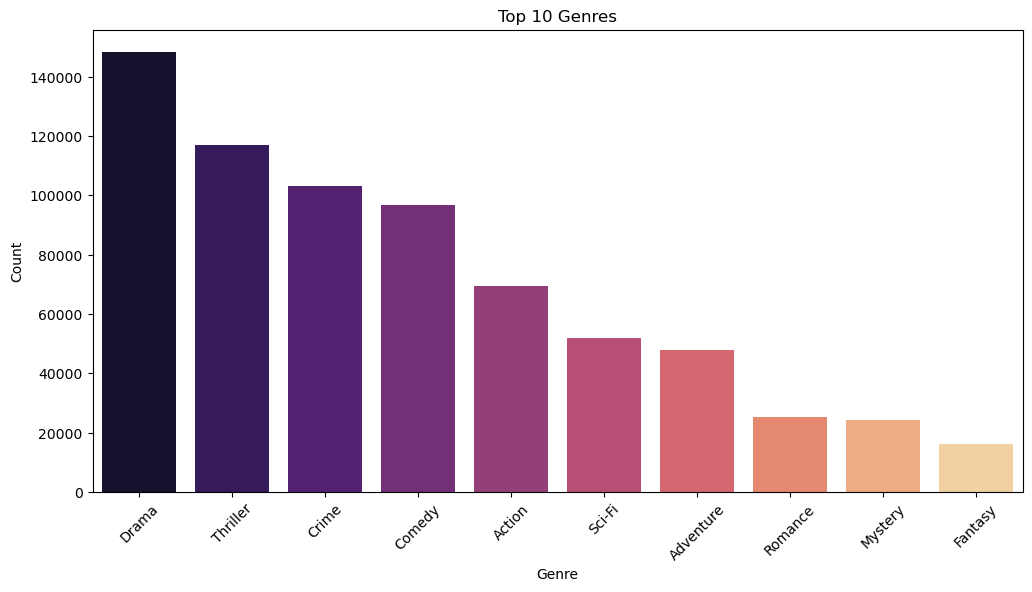

In [266]:
# Plot the top 10 genres
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Drama**(148389) is the top genre.

### 2. Bivariate Analysis

#### 2.1 User id vs Rating

In [103]:
user_ratings = merged_df[['userId', 'title','rating']].drop_duplicates()

Text(0, 0.5, 'Ratings')

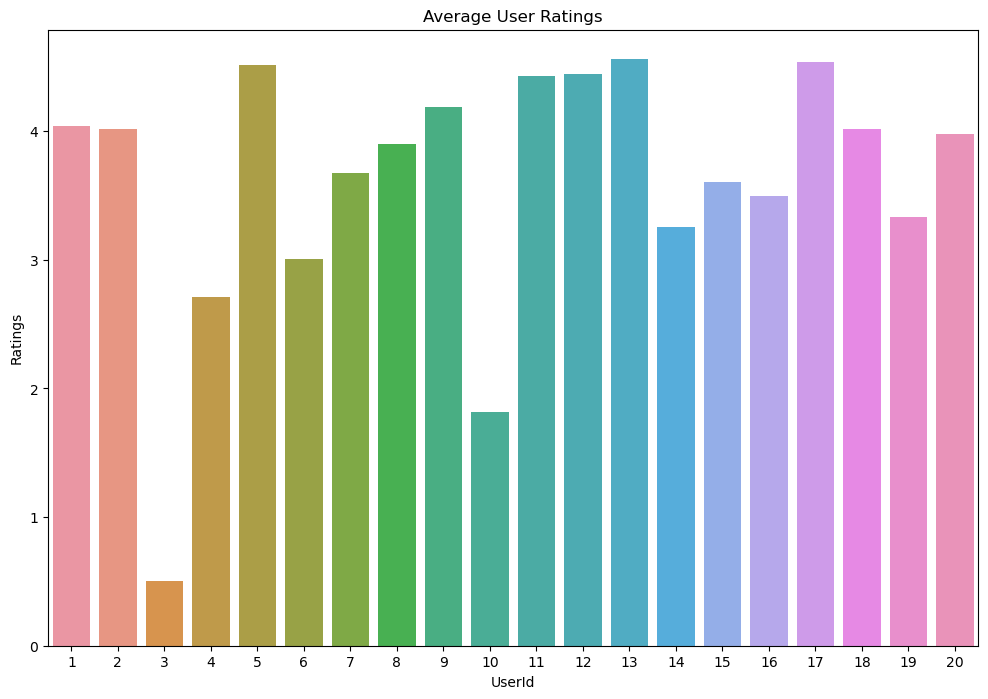

In [113]:
user_ratings = merged_df.groupby('userId').agg({
    'rating':'mean'
}).reset_index()


# plot top 20 user ratings
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x= 'userId', y='rating', data = user_ratings[:20])
plt.title('Average User Ratings')
plt.xlabel('UserId')
plt.ylabel('Ratings')

 #### 2.2 Number of ratings per user

c:\Users\ericm\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


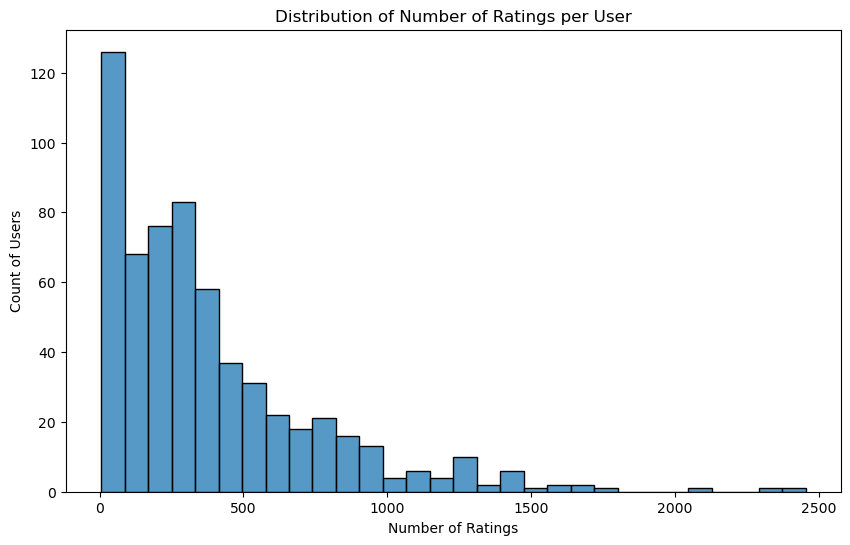

In [116]:
# Number of ratings per user
ratings_per_user = merged_df.groupby('userId')['rating'].count().sort_values(ascending=False)

# Plot the distribution of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, kde=False, bins=30)
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Users")
plt.show();

#### 2.3 Number of ratings per movie

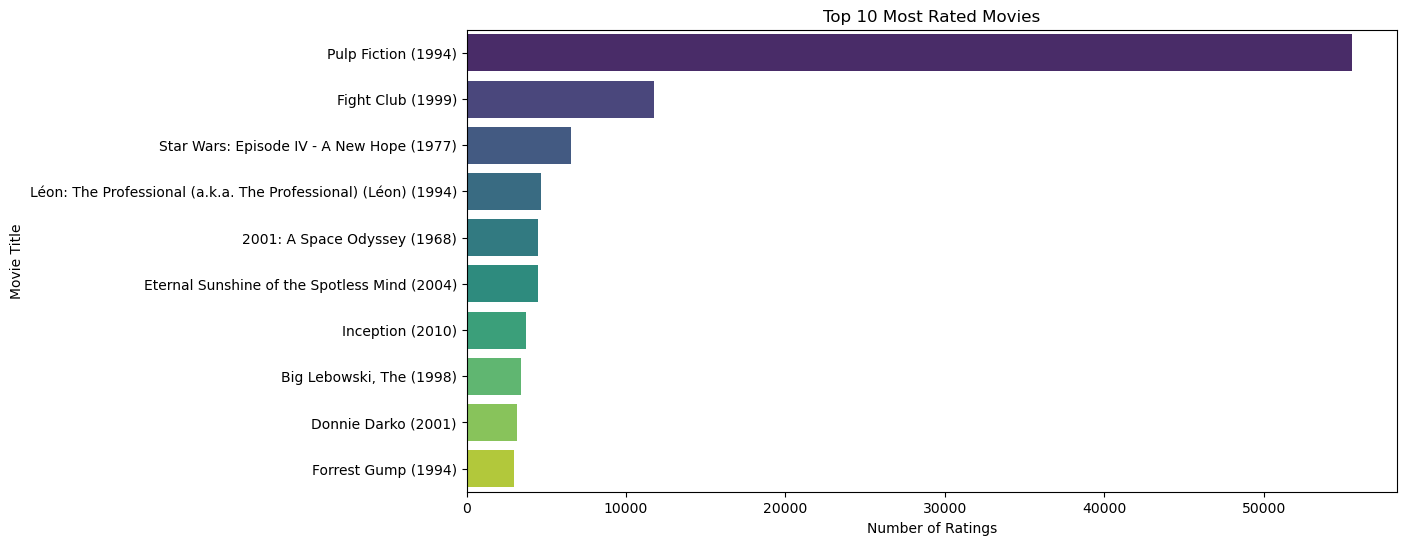

In [115]:
# Number of ratings per movie
ratings_per_movie = merged_df.groupby('title')['rating'].count().sort_values(ascending=False)

# Plot the top 10 most rated movies
top_10_movies = ratings_per_movie.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_movies.values, y=top_10_movies.index, palette='viridis')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()


**PulpFiction** is the most rated movie

#### 2.4 Highest rated Movies

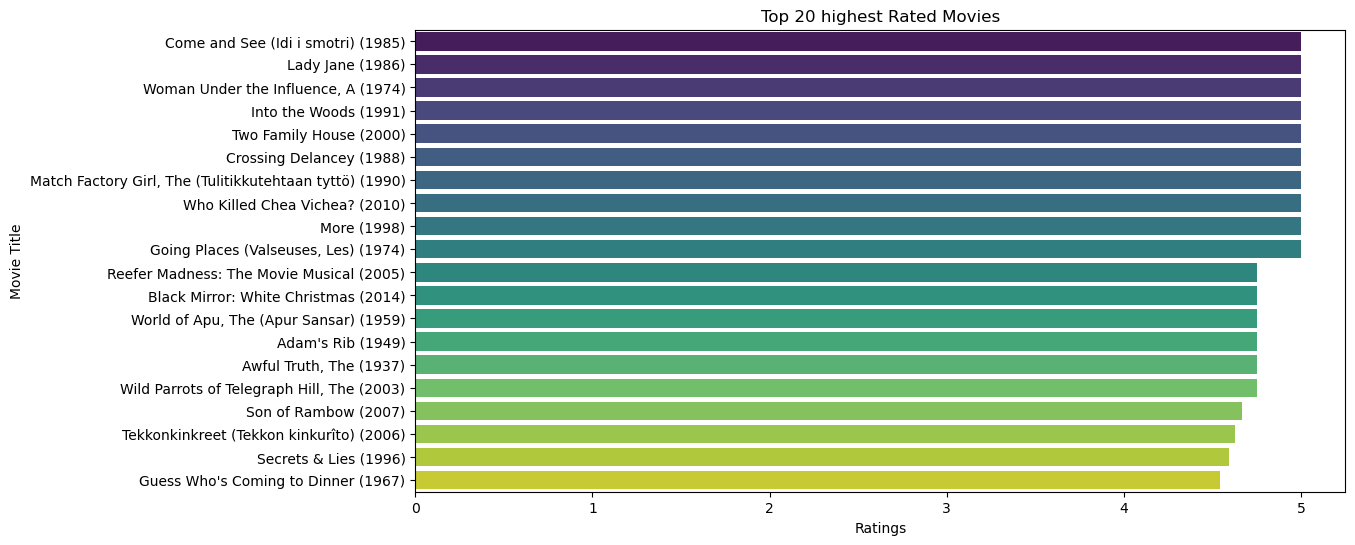

In [123]:
top_rated_movies = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False)
top_rated_movies[:20]

# Plot the top 10 most rated movies
top_20_rated_movies = top_rated_movies[:20]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_rated_movies.values, y=top_20_rated_movies.index, palette='viridis')
plt.title("Top 20 highest Rated Movies")
plt.xlabel("Ratings")
plt.ylabel("Movie Title")
plt.show()

#### 2.5 Ratings by Genre

In [208]:
genre = merged_df
genre

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...
233208,610,168252,5.0,Logan (2017),Action|Sci-Fi,dark
233209,610,168252,5.0,Logan (2017),Action|Sci-Fi,emotional
233210,610,168252,5.0,Logan (2017),Action|Sci-Fi,gritty
233211,610,168252,5.0,Logan (2017),Action|Sci-Fi,heartbreaking


In [209]:
genre['genres'] = genre['genres'].str.split('|')
genre['genres']

0         [Adventure, Animation, Children, Comedy, Fantasy]
1         [Adventure, Animation, Children, Comedy, Fantasy]
2         [Adventure, Animation, Children, Comedy, Fantasy]
3                                         [Comedy, Romance]
4                                         [Comedy, Romance]
                                ...                        
233208                                     [Action, Sci-Fi]
233209                                     [Action, Sci-Fi]
233210                                     [Action, Sci-Fi]
233211                                     [Action, Sci-Fi]
233212                                     [Action, Sci-Fi]
Name: genres, Length: 233213, dtype: object

In [210]:
genres_exploded = genre.explode('genres')
genres_exploded

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure,pixar
0,1,1,4.0,Toy Story (1995),Animation,pixar
0,1,1,4.0,Toy Story (1995),Children,pixar
0,1,1,4.0,Toy Story (1995),Comedy,pixar
0,1,1,4.0,Toy Story (1995),Fantasy,pixar
...,...,...,...,...,...,...
233210,610,168252,5.0,Logan (2017),Sci-Fi,gritty
233211,610,168252,5.0,Logan (2017),Action,heartbreaking
233211,610,168252,5.0,Logan (2017),Sci-Fi,heartbreaking
233212,610,168252,5.0,Logan (2017),Action,predictible plot


In [211]:
genres_exploded['genres'].value_counts()

genres
Drama                 148389
Thriller              116891
Crime                 103102
Comedy                 96901
Action                 69549
Sci-Fi                 51977
Adventure              47939
Romance                25344
Mystery                24352
Fantasy                16220
IMAX                   12263
War                    11737
Children               11595
Animation              10466
Horror                 10199
Musical                 4496
Western                 2354
Film-Noir                783
Documentary              711
(no genres listed)         3
Name: count, dtype: int64

In [212]:
# Average rating per genre
avg_rating_per_genre = genres_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)
avg_rating_per_genre

genres
(no genres listed)    4.500000
Crime                 4.123582
War                   4.094701
Thriller              4.074407
Drama                 4.053360
Film-Noir             4.026181
Comedy                3.992477
Action                3.952206
Mystery               3.923477
Western               3.912489
Sci-Fi                3.901226
Adventure             3.881026
Animation             3.861647
IMAX                  3.858110
Documentary           3.848805
Horror                3.838367
Romance               3.801708
Musical               3.746330
Fantasy               3.737176
Children              3.713066
Name: rating, dtype: float64

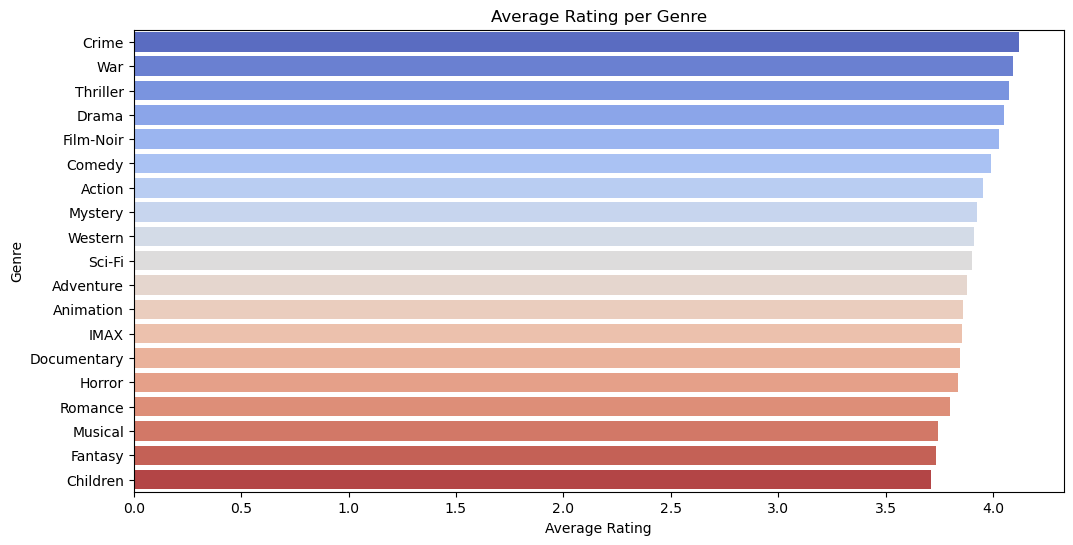

In [213]:
# Plot the average rating per genre
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_genre.values[1:], y=avg_rating_per_genre.index[1:], palette='coolwarm')
plt.title("Average Rating per Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

**Crime**  |  **War** | **Thriller** | **Drama** | **Film-Noir**  - are the top rated genres, with an average of **4.0+**     